In [129]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Question 1

In [130]:
df = pd.read_csv('wine-missing.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [131]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [132]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,unknown,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,unknown,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<Axes: >

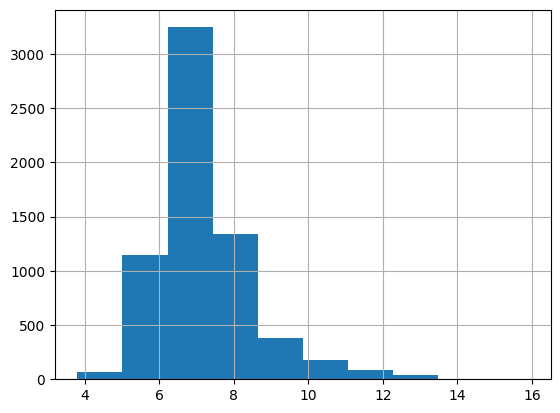

In [133]:
df['fixed acidity'].hist()

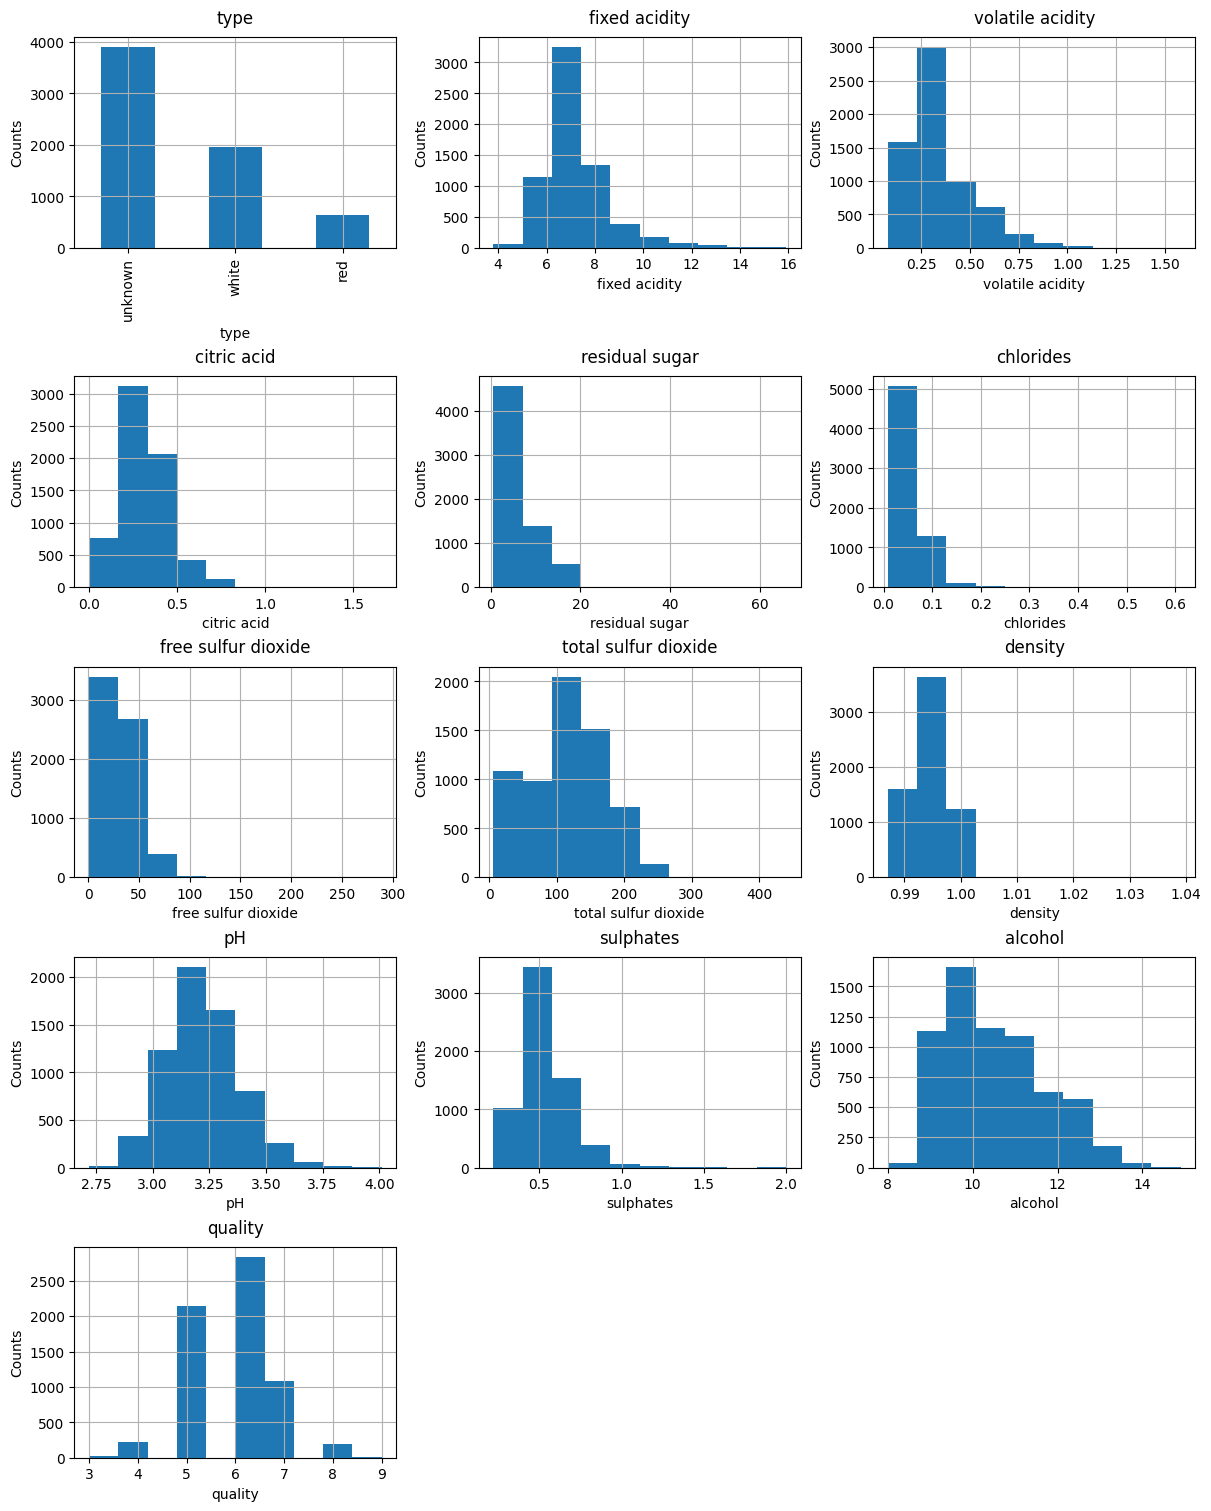

In [134]:
n_cols = len(df.columns)  # 10
cols_per_row = 3
n_rows = math.ceil(n_cols / cols_per_row)  # calculate rows needed for 3 columns per row
width_per_plot = 4
height_per_plot = 3
fig, axs = plt.subplots(n_rows, cols_per_row, figsize=(width_per_plot * cols_per_row, height_per_plot * n_rows),
                        constrained_layout=True)

for col in df.columns:
    axis_indexes = np.unravel_index(df.columns.get_loc(col), axs.shape)  # subplot index for column
    ax = axs[axis_indexes]
    ax.set_title(col, fontsize=12, pad=10)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Counts', fontsize=10)

    if col == 'type':
        df[col].value_counts().plot(kind='bar', ax=ax)
    else:
        df[col].hist(ax=ax)

    ax.grid(True)

# hide empty plots (4x3 grid)
for i in range(n_cols, n_rows * cols_per_row):
    axis_indexes = np.unravel_index(i, axs.shape)
    axs[axis_indexes].set_visible(False)

plt.show()

# Question 2

Cast type values to str and make sure there are no whitespaces, also make everything lowercase

In [135]:
df['type'] = df['type'].astype(str).str.strip().str.lower()
df['type'].unique()

array(['white', 'unknown', 'red'], dtype=object)

In [136]:
df['type'] = df['type'].map({
    'white': 0,
    'red': 1,
    'unknown': 2
})
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [137]:
df.isna()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,True,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [138]:
df.isnull()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,True,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [139]:
x = df.drop(columns=['type']).to_numpy()
y = df['type'].to_numpy()

# Question 3

In [140]:
x_known = df[df['type'] != 2].drop(columns=['type']).to_numpy()
y_known = df[df['type'] != 2]['type'].to_numpy()
x_unknown = df[df['type'] == 2].drop(columns=['type']).to_numpy()

# Question 4

In [141]:
x_known_train, x_known_test, y_known_train, y_known_test = train_test_split(x_known, y_known, train_size=0.7,
                                                                            test_size=0.3, random_state=42,
                                                                            stratify=y_known)